# 8. 回归
我们所知道的回归是由达尔文的表兄弟Francis Galton发明的。其于1877年完成了第一次回归预测，目的是根据上一代豌豆种子（双亲）的尺寸来预测下一代豌豆种子（孩子）的尺寸。Galton在大量对象上应用了回归分析，甚至包括人的身高。他注意到，如果双亲的高度比平均高度高，他们的子女也倾向于比平均高度高，但尚不及双亲。孩子的高度向着平均高度回退（回归）。Galton在多项研究上都注意到这个现象，尽管这个英文单词跟数值预测没有任何关系，但这种研究方法仍被称作回归。

## 8.1. 标准回归函数
通过使平方误差最小来求回归系数$\omega$，平方误差可以写做：$\sum_{i=1}^m(y_i-x_i^T\omega)^2$,其中$y_i$表示真实的标签值$x_i^T\omega$表示预测的标签值，用矩阵表示还可以写成$(y-X\omega)^T(y-X\omega)$。如果对$\omega$求导，得到$X^T(Y-X\omega)$，令其等于零，解出$\omega$如下：

$
\hat{\omega}=(X^TX)^{-1}X^Ty
$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
'''
根据上面的公式编码：
需要考虑矩阵是否可逆，linalg.dat计算行列式，值为0表示矩阵不可逆
'''
def strandRegress(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matris is singular, cannot do inverse")
        return
    ws = xTx.I*(xMat.T*yMat)
    return ws

In [8]:
datadf = pd.read_csv("ex0.txt", sep='\t', header=None)
dataArr = datadf.iloc[:,0:-1]
labels = datadf.iloc[:,-1]
ws = strandRegress(dataArr, labels)

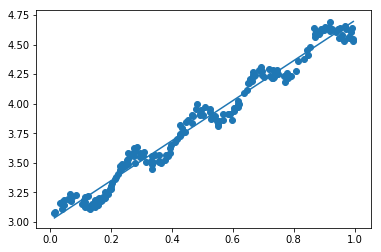

In [11]:
xMat = np.mat(dataArr)
yMat = np.mat(labels)
yHat = xMat*ws
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])
xCopy = xMat.copy()
xCopy.sort(0)
yHat=xCopy*ws
ax.plot(xCopy[:,1],yHat)
plt.show()

In [17]:
xMat[:,1].flatten().A[0]

array([0.067732, 0.42781 , 0.995731, 0.738336, 0.981083, 0.526171,
       0.378887, 0.033859, 0.132791, 0.138306, 0.247809, 0.64827 ,
       0.731209, 0.236833, 0.969788, 0.607492, 0.358622, 0.147846,
       0.63782 , 0.230372, 0.070237, 0.067154, 0.925577, 0.717733,
       0.015371, 0.33507 , 0.040486, 0.212575, 0.617218, 0.541196,
       0.045353, 0.126762, 0.556486, 0.901144, 0.958476, 0.274561,
       0.394396, 0.87248 , 0.409932, 0.908969, 0.166819, 0.665016,
       0.263727, 0.231214, 0.552928, 0.047744, 0.365746, 0.495002,
       0.493466, 0.792101, 0.76966 , 0.251821, 0.181951, 0.808177,
       0.334116, 0.33863 , 0.452584, 0.69477 , 0.590902, 0.307928,
       0.148364, 0.70218 , 0.721544, 0.666886, 0.124931, 0.618286,
       0.381086, 0.385643, 0.777175, 0.116089, 0.115487, 0.66351 ,
       0.254884, 0.993888, 0.295434, 0.952523, 0.307047, 0.277261,
       0.279101, 0.175724, 0.156383, 0.733165, 0.848142, 0.771184,
       0.429492, 0.162176, 0.917064, 0.315044, 0.201473, 0.297

## 8.2. 局部加权线性回归
线性回归的一个问题是有可能出现欠拟合现象，其中一个办法是局部加权线性回归。给待检测点附近的每一个点赋予一定的权重，然后在这个子集上基于最小均方差来进行普通回归。与kNN一样，这种算法每次预测均需要事先选取出对应的数据子集。该算法解出回归系数w的形式如下：

$\hat{w}=(X^TWX)^{-1}X^TWy$
其中w是一个矩阵，用来给每个数据点赋予权重。  
局部加权线性回归使用“核”（与支持向量机中的核类似）来对附近的点赋予更高的权重。最常用的是高斯核：  
$
w(i,i)=exp\big(\frac{|x^{(i)}-x|}{-2k^2} \big)
$
这样构建了一个只含对角元素的权重矩阵w，并且点x与x(i)越近，w(i,i)将会越大。上述公式包含一个需要用户指定的参数k，它决定了对附近的点赋予多大的权重，这也是使用局部加权线性回归时唯一要考虑的参数。

In [87]:
'''
    testPoint: 行向量
    xArr: 训练集
    yArr: 标签集
'''
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    m  = xArr.shape[0]
    # 创建对角矩阵
    weights = np.mat(np.eye((m)))
    
    # 对每一行
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = np.exp(diffMat*diffMat.T/(-2.0*k**2))
        
    xTx = xMat.T * (weights*xMat)
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T *(weights * yMat))
    return testPoint * ws

'''
    testArr: 测试集
    xArr: 训练集
    yArr: 标签集
'''
def lwlrTest(testArr, xArr, yArr, k=1.0):
    testArr = np.mat(testArr)
    m = xArr.shape[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i,:], xArr, yArr,k)
    return yHat

In [102]:
yHat1 = lwlrTest(dataArr, dataArr, labels, 1)
yHat2 = lwlrTest(dataArr, dataArr, labels, 0.01)
yHat3 = lwlrTest(dataArr, dataArr, labels, 0.03)

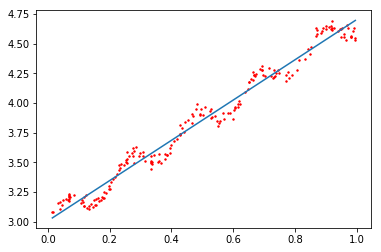

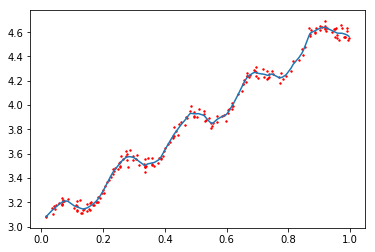

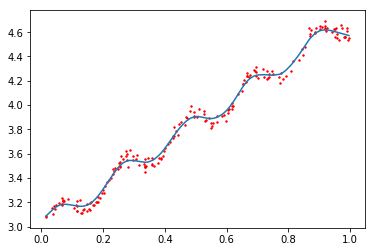

In [103]:
def draw(yHat):
    xMat = np.mat(dataArr)
    srtInd = xMat[:,1].argsort(0)
    xSort = xMat[srtInd][:,0,:]
    ysort = yHat[srtInd][:,0]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(xSort[:,1], ysort)
    ax.scatter(xMat[:,1].flatten().A[0], np.mat(labels).T.flatten().A[0],s=2,c='red')
    plt.show()
    
draw(yHat1)
draw(yHat2)
draw(yHat3)

## 8.3. 预测鲍鱼年龄

In [104]:
def rssError(yArr, yHarArr):
    return ((yArr - yHarArr)**2).sum()

In [105]:
longdf = pd.read_csv("abalone.txt", sep='\t', header=None)
abX = np.array(longdf.iloc[:,0:-1])
abY = np.array(longdf.iloc[:,-1])

yHat01 = lwlrTest(abX[0:99], abX[0:99], abY[0:99],0.1)
yHat1 = lwlrTest(abX[0:99], abX[0:99], abY[0:99],1)
yHat10 = lwlrTest(abX[0:99], abX[0:99], abY[0:99],10)

In [107]:
print(rssError(abY[0:99], yHat01.T))
print(rssError(abY[0:99], yHat1.T))
print(rssError(abY[0:99], yHat10.T))

56.783061380972846
429.8905618701546
549.1181708825102


**使用较小的核容易造成过拟合，对新数据不一定能达到最好的预测效果**

In [108]:
yHat01 = lwlrTest(abX[100:199], abX[0:99], abY[0:99],0.1)
yHat1 = lwlrTest(abX[100:199], abX[0:99], abY[0:99],1)
yHat10 = lwlrTest(abX[100:199], abX[0:99], abY[0:99],10)
print(rssError(abY[100:199], yHat01.T))
print(rssError(abY[100:199], yHat1.T))
print(rssError(abY[100:199], yHat10.T))

227485.24120745284
573.5261441899553
517.5711905383293


与简单线性回归做对比

In [109]:
ws = strandRegress(abX[0:99], abY[0:99])
yHat = np.mat(abX[100:199])*ws
rssError(abY[100:199], yHat.T.A)

518.6363153245803

## 8.4. 缩减系数来“理解数据”

如果数据的特征币样本点的数量还多，就不能使用之前的方法，因为在计算$(X^TX)^{-1}的时候会出错$。$X_{m*n}$n>m时，X矩阵不是满秩矩阵，在求逆时会出问题。

为了解决这个问题，引入了岭回归(ridge regression)。

### 8.4.1. 岭回归
简单的说，岭回归就是在矩阵$X^TX$上加一个$\lambda I$从而使矩阵非奇异，进而能对$X^TX+\lambda I$求逆。其中矩阵I是一个$m*m$的单位矩阵。回归系数计算公式变成了：

$
\hat{w} = (X^TX+\lambda I)^{-1}X^Ty
$

岭回归最先用来处理特征数大于样本数的情况，现在也用于在估计中加入偏差，从而得到更好的估计。这里通过引入$\lambda$来限制了所有w之和，通过引入惩罚项，能减少不重要的参数，这个技术在统计学中也叫作**缩减(sharinage)**

In [116]:
def ridgeRegress(xMat, yMat, lambdaa=0.2):
    xTx = xMat.T*xMat
    denom = xTx + np.eye(xMat.shape[1])*lambdaa
    if np.linalg.det(denom) == 0.0:
        print("this matrix is ingular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

def ridgeTest(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    
    # 数据标准化 start
    # 均值
    yMean = np.mean(yMat, 0)
    xMean = np.mean(xMat, 0)
    # 均方差
    xVar = np.var(xMat, 0)
    yMat = yMat - yMean
    xMat = (xMat - xMean)/xVar
    # 数据标准化 end
    
    numTestPts = 30
    wMat = np.zeros((numTestPts, xMat.shape[1]))
    
    for i in range(numTestPts):
        ws = ridgeRegress(xMat, yMat, np.exp(i-10))
        wMat[i,:]=ws.T
    return wMat

In [117]:
ridgeWeights = ridgeTest(abX, abY)

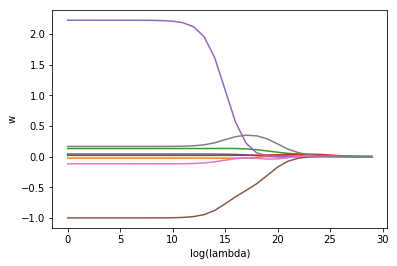

In [121]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.xlabel("log(lambda)")
plt.ylabel("w")
plt.show()